Purpose: find out the range/histogram, etc. of temperatures studied as heat, cold, and control in the dataset. (Also, incidentally, find out number of genotypes studied.)<br>
Author: Anna Pardo<br>
Date initiated: Sept. 25, 2023

In [47]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# load metadata about samples
md = pd.read_csv("../../data/srr_numbers_with_metadata_12-May-2023.csv",sep=",",header="infer")
md.head()

,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [3]:
# first order of business: how many genotypes are there?
len(md["Genotype"].unique())

328

In [4]:
max(md["Day_temp_C"])

50.0

In [3]:
# subset to heat, cold, and control (all experiments)
mdh = md[md["Treatment"]=="Heat"]
mdcold = md[md["Treatment"]=="Cold"]
mdcont = md[md["Treatment"]=="Control"]

In [6]:
# find min, max, and mean temperatures
## write a function
def temp_summary(df):
    # first drop NAs from Day_temp_C column
    df = df.dropna(subset=["Day_temp_C"])
    # calculate summary stats
    maxtemp = max(df["Day_temp_C"])
    mintemp = min(df["Day_temp_C"])
    meantemp = sum(df["Day_temp_C"])/len(df["Day_temp_C"])
    return maxtemp,mintemp,meantemp

In [7]:
hmax,hmin,hmean = temp_summary(mdh)
print("Maximum heat stress temperature:",hmax)
print("Minimum heat stress temperature:",hmin)
print("Mean heat stress temperature:",hmean)

Maximum heat stress temperature: 50.0
Minimum heat stress temperature: 32.0
Mean heat stress temperature: 38.160427807486634


In [8]:
comax,comin,comean = temp_summary(mdcold)
print("Maximum cold stress temperature:",comax)
print("Minimum cold stress temperature:",comin)
print("Mean cold stress temperature:",comean)

Maximum cold stress temperature: 20.0
Minimum cold stress temperature: 5.0
Mean cold stress temperature: 6.956204379562044


In [9]:
ctmax,ctmin,ctmean = temp_summary(mdcont)
print("Maximum control temperature:",ctmax)
print("Minimum control temperature:",ctmin)
print("Mean control temperature:",ctmean)

Maximum control temperature: 31.0
Minimum control temperature: 22.0
Mean control temperature: 26.872013651877133


Text(0.5, 1.0, 'Histogram of day temperature (C) for control samples')

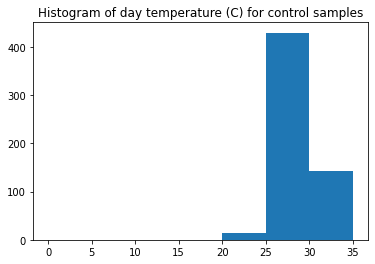

In [19]:
# plot histograms of day temperatures for the three conditions
## start with control
plt.hist(mdcont["Day_temp_C"],bins=[0,5,10,15,20,25,30,35])
plt.title("Histogram of day temperature (C) for control samples")

Text(0.5, 1.0, 'Histogram of day temperature (C) in heat samples')

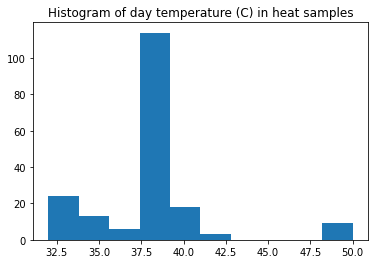

In [11]:
plt.hist(mdh["Day_temp_C"])
plt.title("Histogram of day temperature (C) in heat samples")

Text(0.5, 1.0, 'Histogram of day temperature (C) in cold samples')

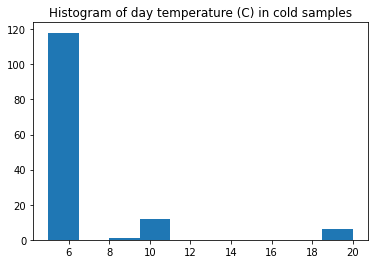

In [12]:
plt.hist(mdcold["Day_temp_C"])
plt.title("Histogram of day temperature (C) in cold samples")

Text(0, 0.5, 'Frequency')

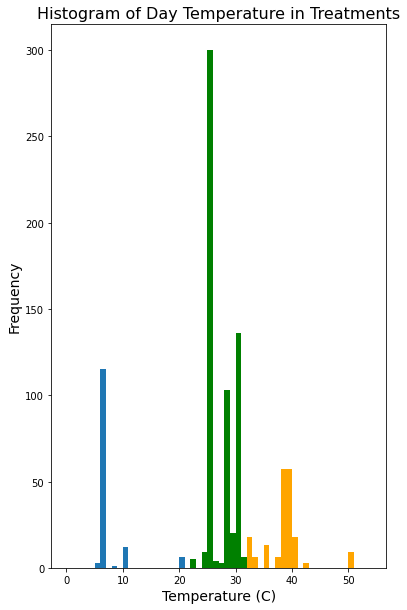

In [33]:
fig,ax=plt.subplots(figsize=(6,10))
plt.hist(mdcold["Day_temp_C"],bins=list(range(0,55,1)))
plt.hist(mdh["Day_temp_C"],color="orange",bins=list(range(0,55,1)))
plt.hist(mdcont["Day_temp_C"],color="g",bins=list(range(0,55,1)))
plt.title("Histogram of Day Temperature in Treatments",fontsize=16)
plt.xlabel("Temperature (C)",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
#plt.savefig("../../figures/temperatures_histogram.svg",bbox_inches="tight")

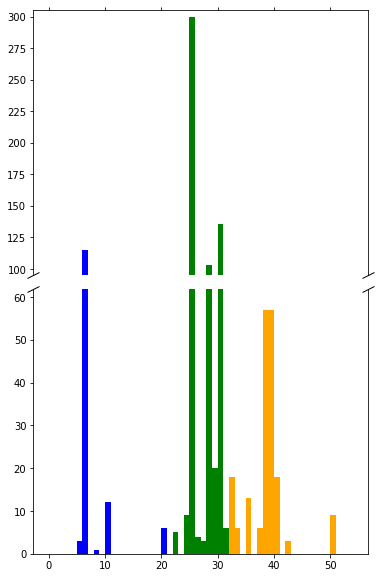

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,10))
fig.subplots_adjust(hspace=0.05)

ax1.hist(mdcont["Day_temp_C"],color="g",bins=list(range(0,55,1)))
ax2.hist(mdcont["Day_temp_C"],color="g",bins=list(range(0,55,1)))

ax1.hist(mdcold["Day_temp_C"],color="b",bins=list(range(0,55,1)))
ax2.hist(mdcold["Day_temp_C"],color="b",bins=list(range(0,55,1)))

ax1.hist(mdh["Day_temp_C"],color="orange",bins=list(range(0,55,1)))
ax2.hist(mdh["Day_temp_C"],color="orange",bins=list(range(0,55,1)))

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(95, 305)  # outliers only
ax2.set_ylim(0, 62)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

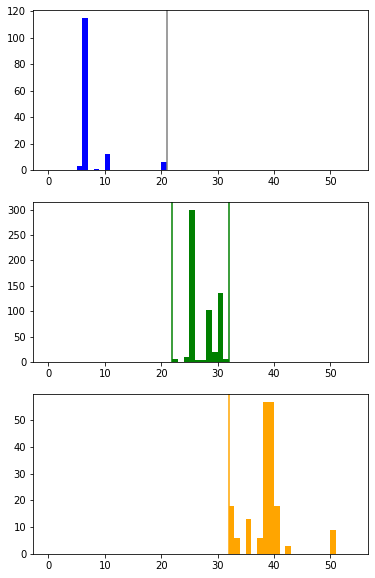

In [46]:
# set up 3 histograms with shared X axes & independent Y axes
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,10))

ax1.hist(mdcold["Day_temp_C"],color="b",bins=list(range(0,55,1)))
ax2.hist(mdcont["Day_temp_C"],color="g",bins=list(range(0,55,1)))
ax3.hist(mdh["Day_temp_C"],color="orange",bins=list(range(0,55,1)))

# plot max line for cold, min and max for control, min line for heat
ax1.axvline(x=21,color="gray")
ax2.axvline(x=22,color="gray")
ax2.axvline(x=32,color="gray")
ax3.axvline(x=32,color="gray")

# plot legend
